In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from projection import simple_weight
from infomap_detect import infomap_detect, drawNetwork

In [2]:
df = pd.read_csv("../../data/disease_edgelist.csv")
df_att = pd.read_csv("../../data/disease_attributes.csv",index_col="Id")
subclass = list(set(df_att[df_att["Subclass"] != "gene"]["Subclass"]))
display(df.head(3),df_att.head(3))

,Source,Target,Edge_id
0,1285,3211,0
1,468,2914,1
2,416,3825,2


,Label,Class,Subclass
Id,,,
55,Deafness,disease,"Ear,Nose,Throat"
47,Leukemia,disease,Cancer
114,Colon cancer,disease,Cancer


In [3]:
G = nx.convert_matrix.from_pandas_edgelist(df,"Source","Target",create_using=nx.Graph())
nx.set_node_attributes(G,df_att.to_dict(orient="index"))


/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


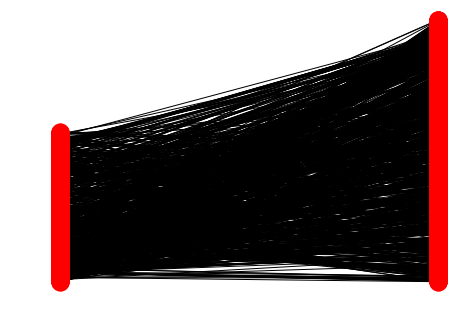

In [4]:
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(G, pos=pos)
plt.show()

In [5]:
w_U,w_V = simple_weight(G)

In [6]:
for node in w_U.nodes():
    w_U.nodes[node]["Label"] = G.nodes[node]["Label"]
    w_U.nodes[node]["Subclass"] = G.nodes[node]["Subclass"]

In [7]:
w_U.node[30]

{'Label': 'Alzheimer disease', 'Subclass': 'Neurological'}

In [8]:
from networkx.algorithms.community import k_clique_communities
plt.rcParams['figure.figsize']=[15,7] #Just to make the figures quite bigger

In [9]:
c = []
for i in range(2,10):
    c.append(list(k_clique_communities(w_U, i)))

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


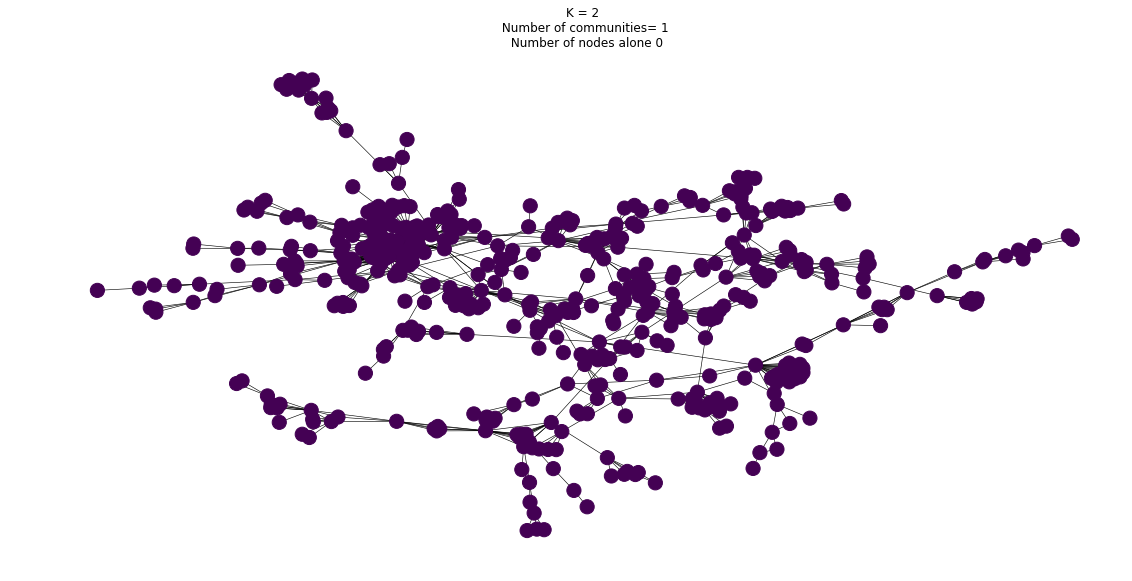

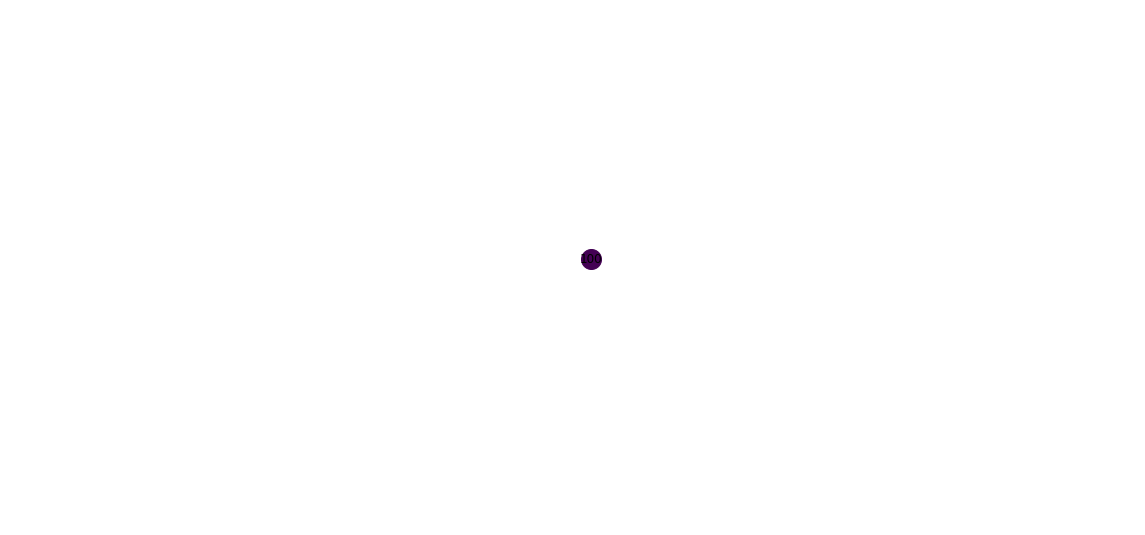

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


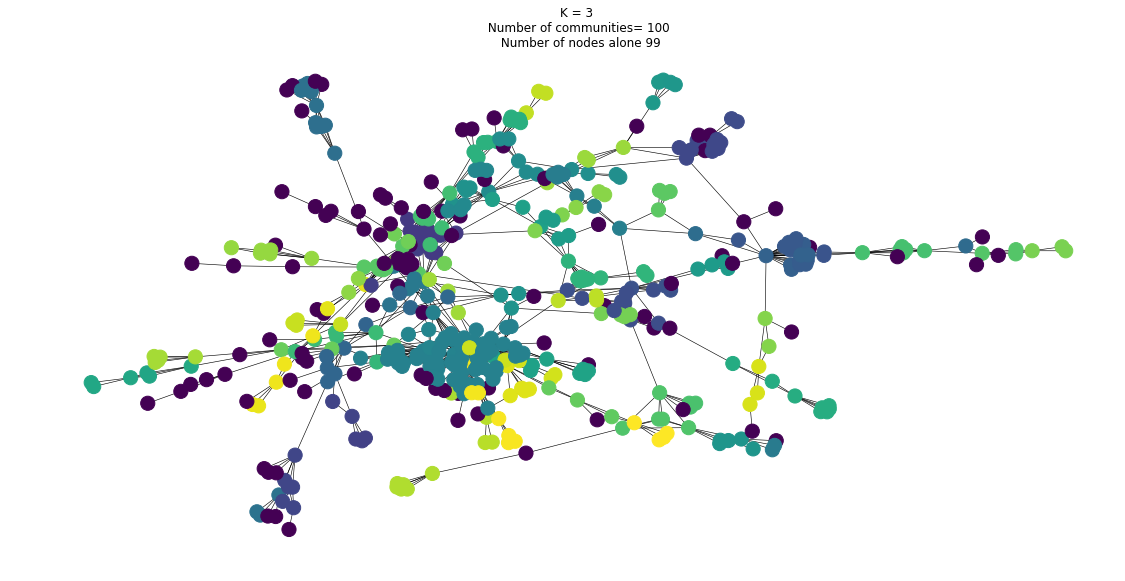

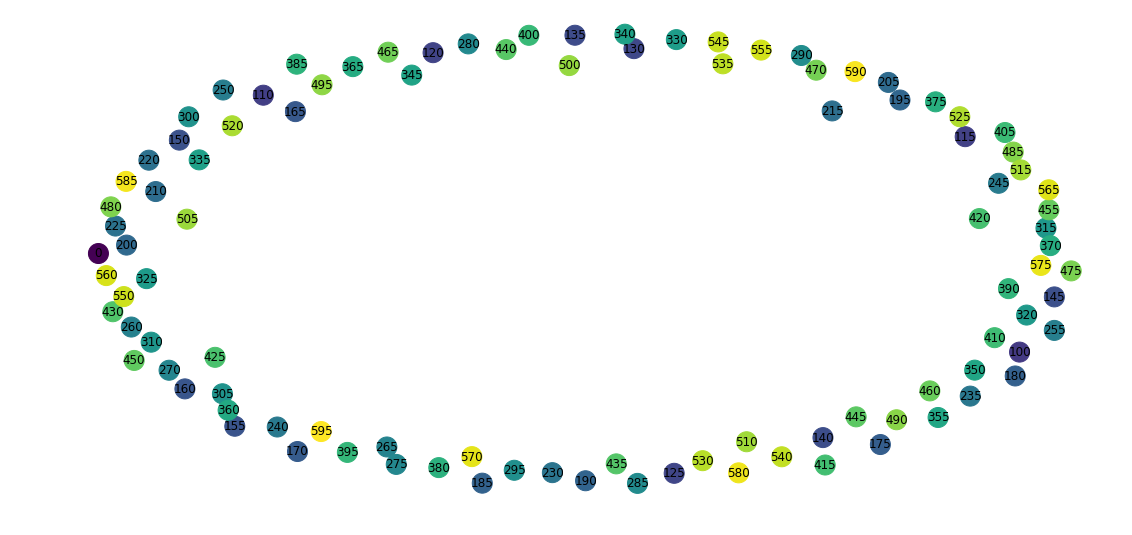

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


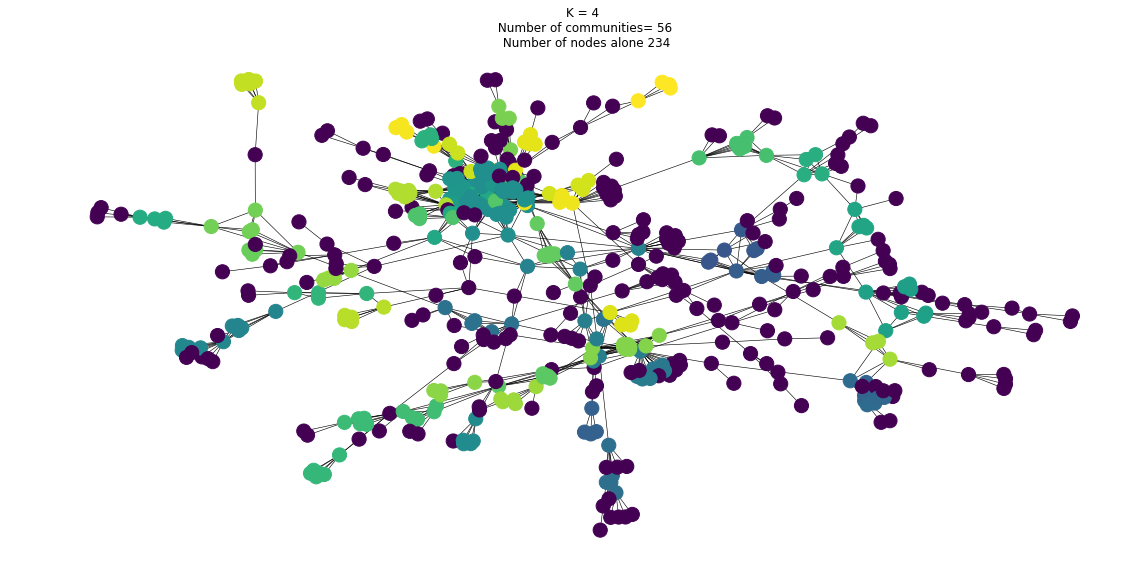

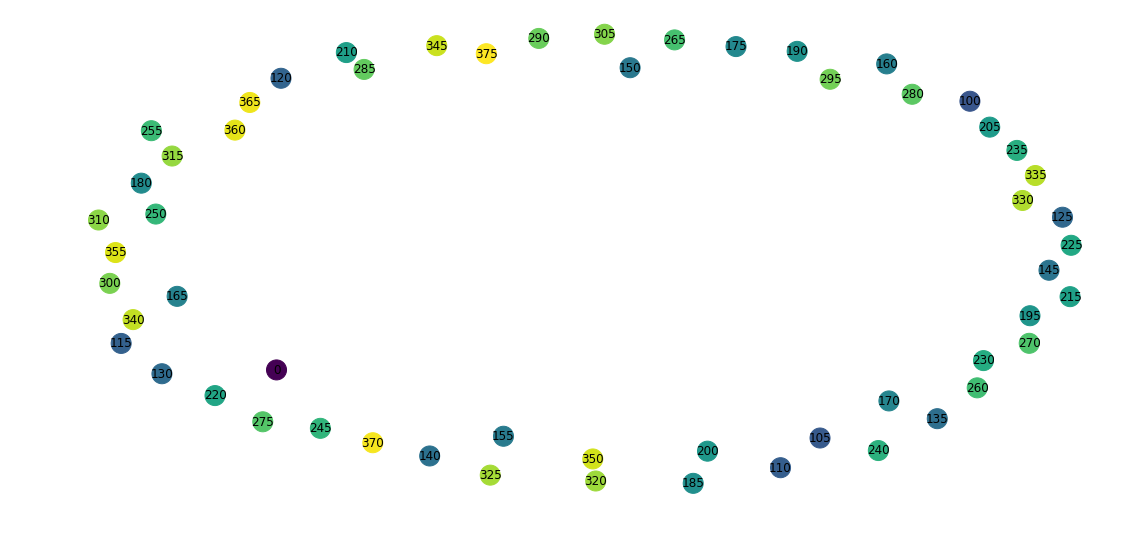

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


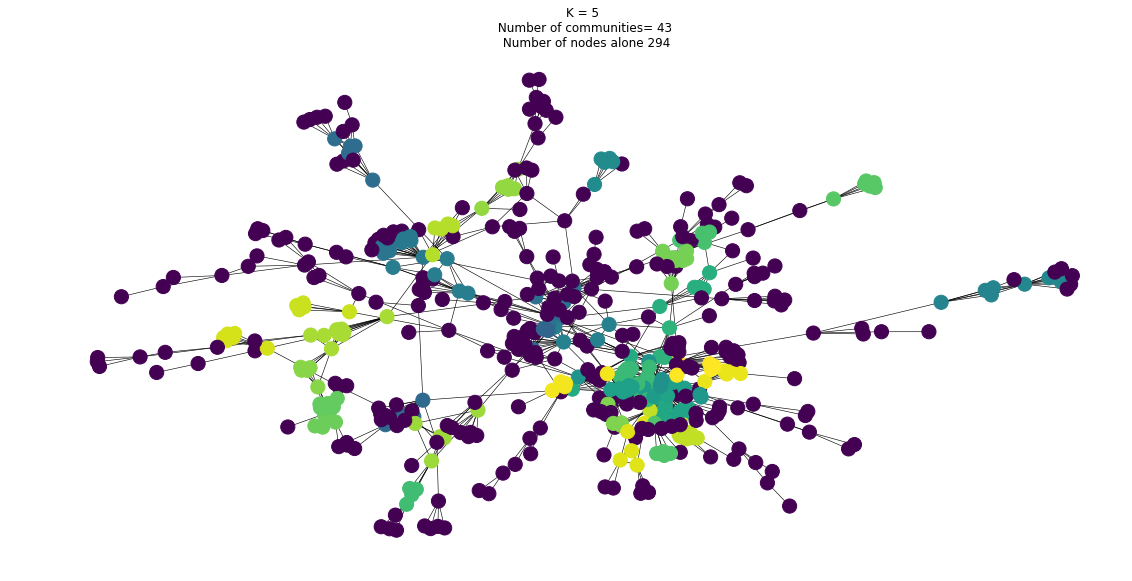

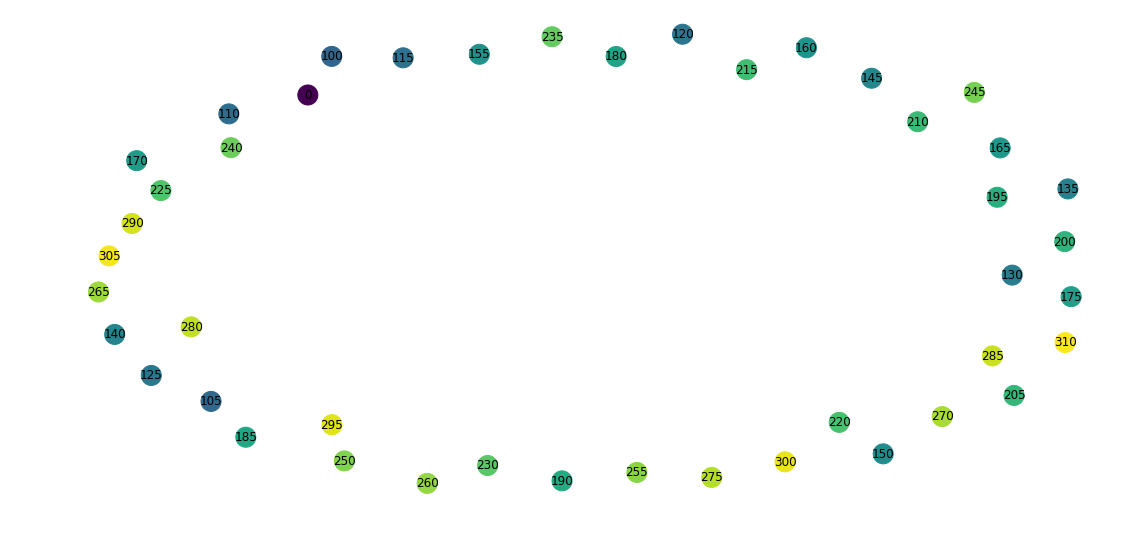

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


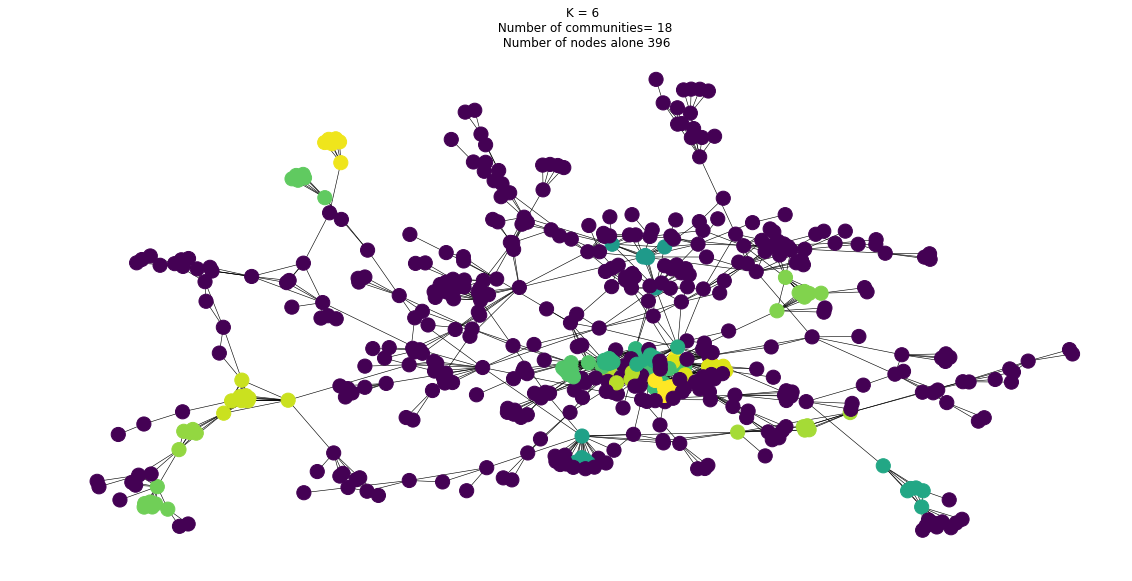

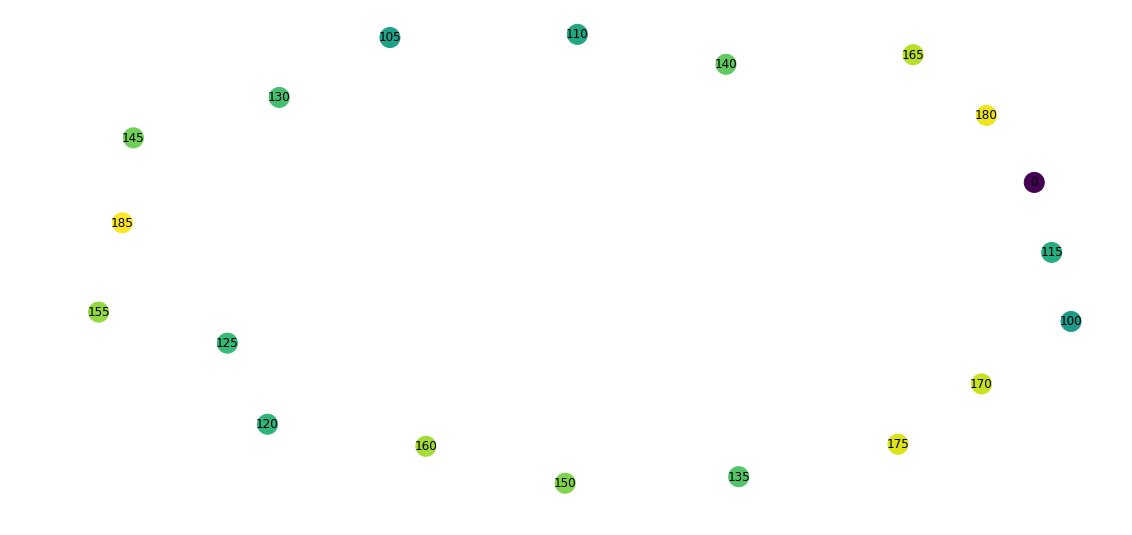

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


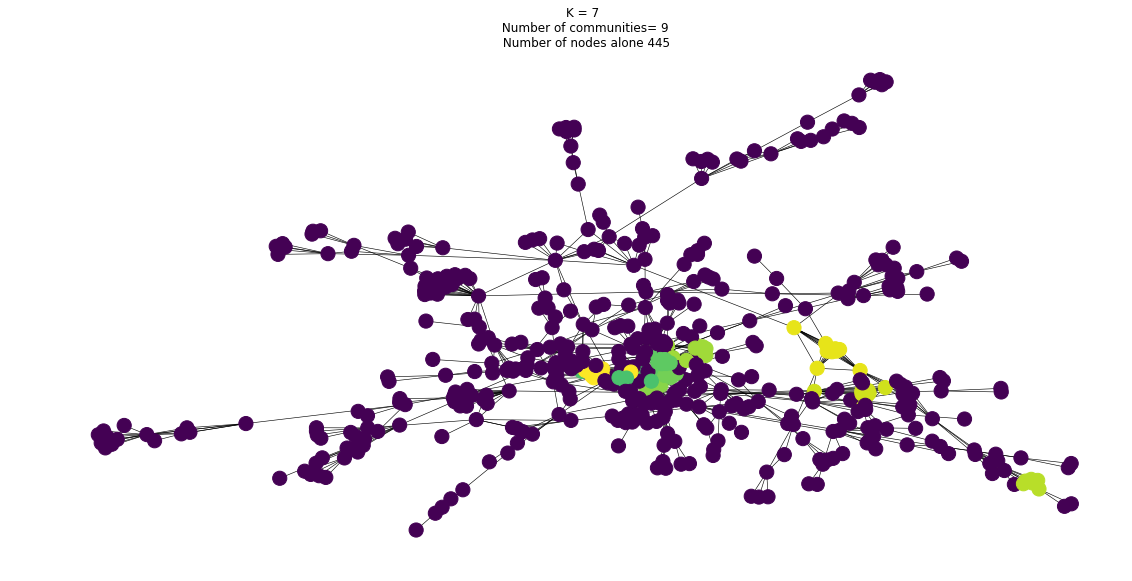

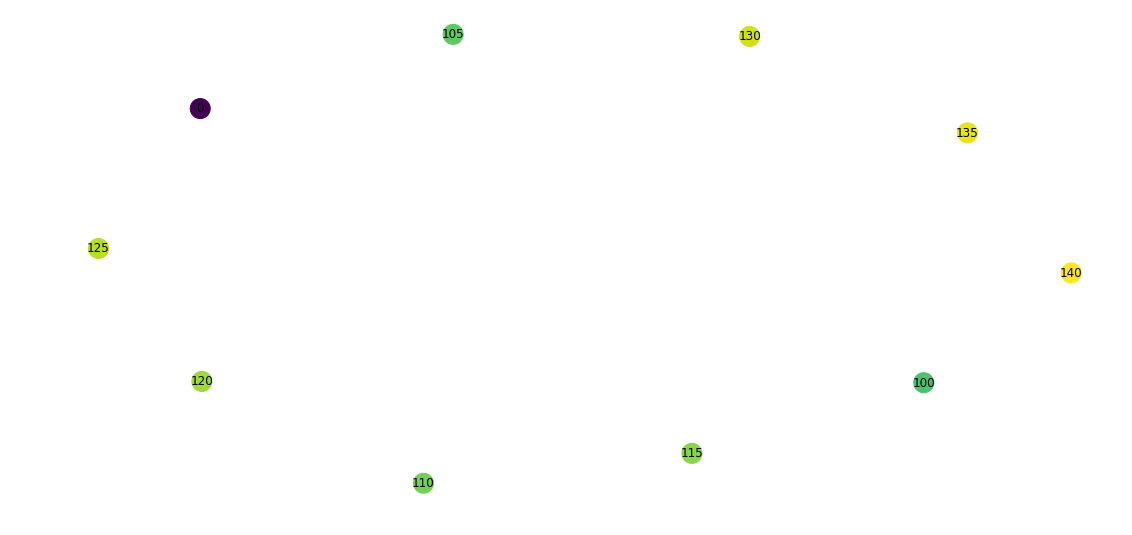

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


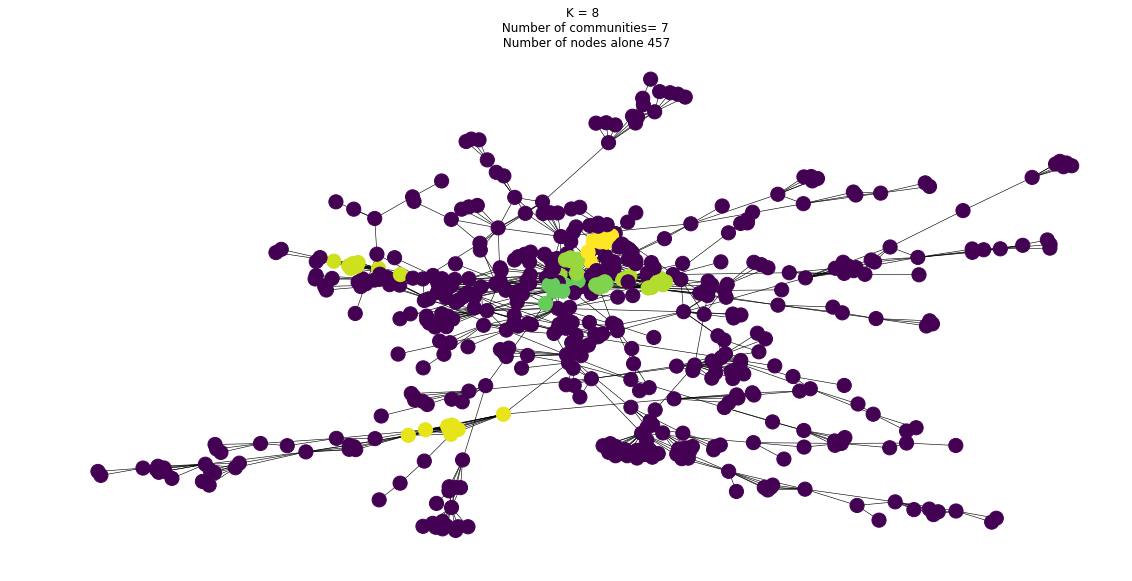

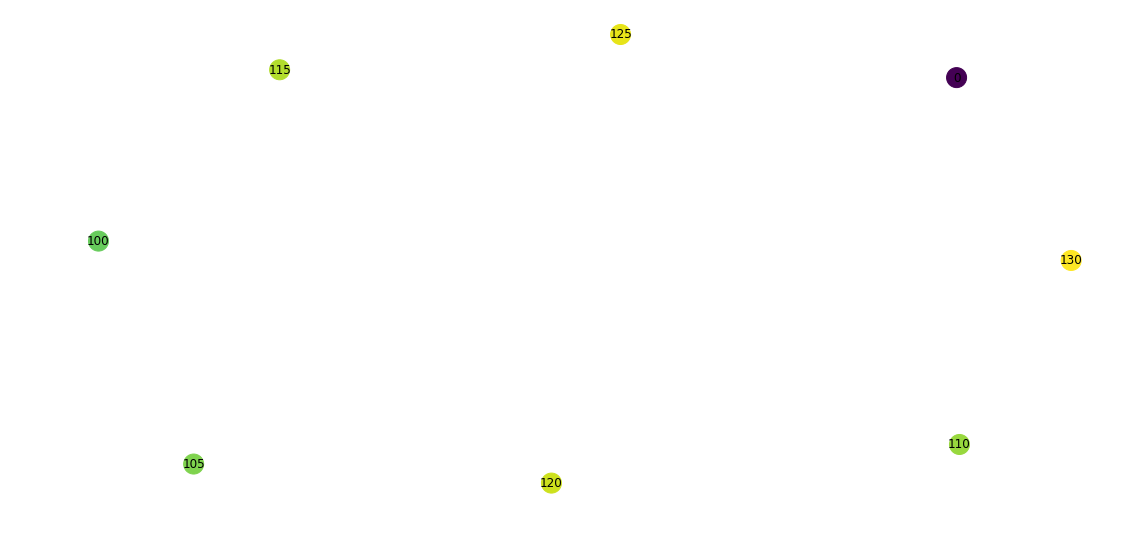

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


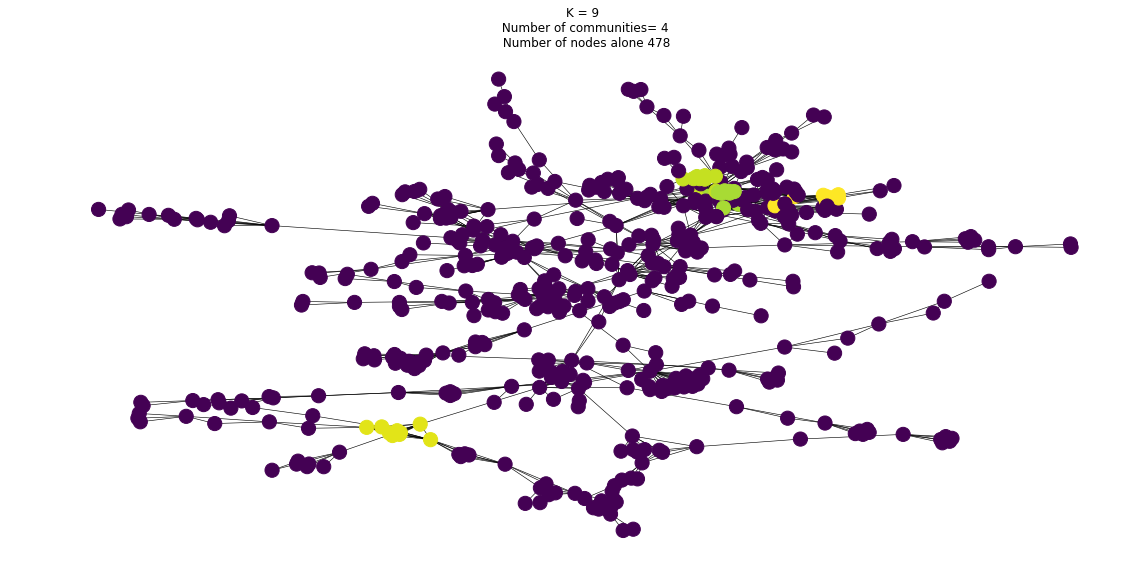

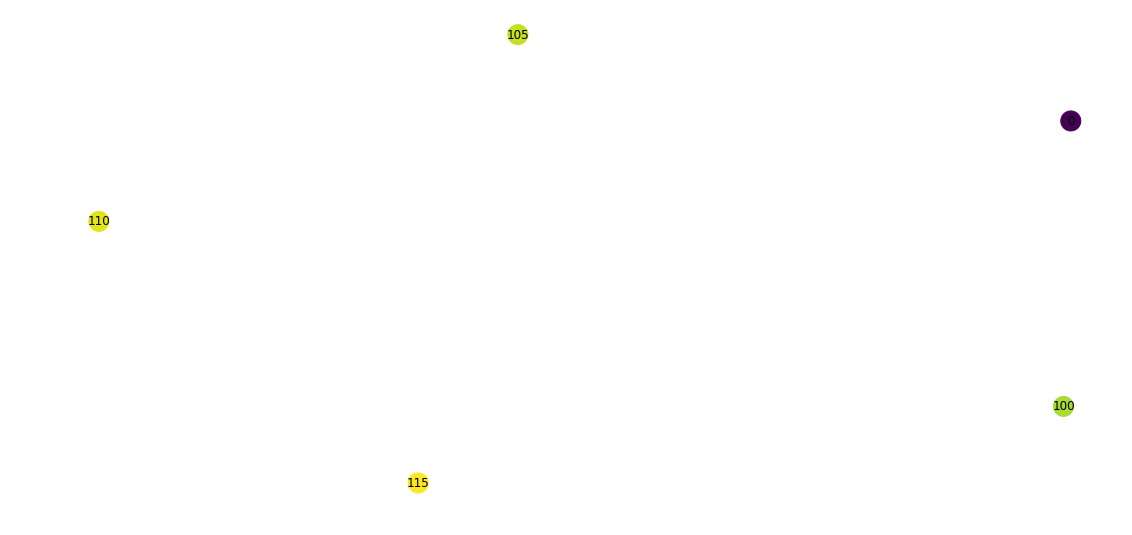

In [10]:
for idx, graph in enumerate(c):
    
    colors = {}
    for node in w_U.nodes():
        colors[node] = 0
    start = 100
    for li in list(graph):
        for elm in list(li):
            colors[elm] = start
        start += 5
    col = [colors[node] for node in w_U.nodes()]
    for node in w_U.nodes():
        w_U.nodes[node]["com_k{}".format(idx+2)] = colors[node]
    nx.draw(w_U, node_color=col,node_size=200,width=0.6)
    titl = "K = {} \n Number of communities= {} \n Number of nodes alone {}".format(idx+2,len(list(graph)),col.count(0))
    plt.title(titl)
    plt.show()
    
    G = nx.Graph()
    G.add_nodes_from(sorted(set(col)))
    nx.draw(G,node_size=400,node_color=sorted(set(col)),with_labels= True)
    plt.show()

In [11]:
def plot_com(com):
    com_k6 = {}
    for node in w_U.nodes():
        com_k6.setdefault(w_U.nodes[node][com],[])
        com_k6[w_U.nodes[node][com]].append(w_U.nodes[node]['Subclass'])
        
    for group in com_k6.keys():
        temp_df = pd.DataFrame(np.array(com_k6[group]),columns=np.array([group]))
        sns.catplot(x=group, kind="count", data=temp_df)
        print(len(com_k6[group])," nodes in this community, with community number: {}".format(group))
        plt.show()
        print("\n\n")

In [31]:
def stack_plot(G,com):
    plt.rcParams['figure.figsize']=[15,15] #Just to make the figures quite bigger
    plot_dict = {}
    for node in G.nodes():
        plot_dict.setdefault(G.nodes[node][com],[]) 
        plot_dict[G.nodes[node][com]].append(G.nodes[node]['Subclass'])
    mat = np.zeros((len(subclass),len(plot_dict.keys())))
    print(mat.shape)
    
    #print(plot_dict)
    for col in range(mat.shape[1]):
        for row in range(mat.shape[0]):
            #print(col,row)
            counter = plot_dict[list(plot_dict.keys())[col]].count(subclass[row])
            mat[row,col] = counter
    
    N = mat.shape[1]
    ind = np.arange(N)    # the x locations for the groups
    width = 0.85       # the width of the bars: can also be len(x) sequence
    bars = []
    for dis in range(mat.shape[0]):
        bars.append(plt.barh(ind, mat[dis,:], width))
        

    plt.ylabel('Community')
    plt.title('Distribution from %s'%com)
    plt.yticks(ind, [col for col in range(mat.shape[1])])
    #ticks = np.arange(0, 35, 1) if com != "Subclass" else np.arange(0, 100, 5)
    #plt.xticks(ticks)
    plt.legend([bar[0] for bar in bars], subclass)
    plt.show()



In [32]:
info_wrapper, communities, w_U = infomap_detect(w_U)

Find communities with Infomap...
Found 51 modules with codelength: 4.679897251186614
Actually found 51 communities.


(22, 22)


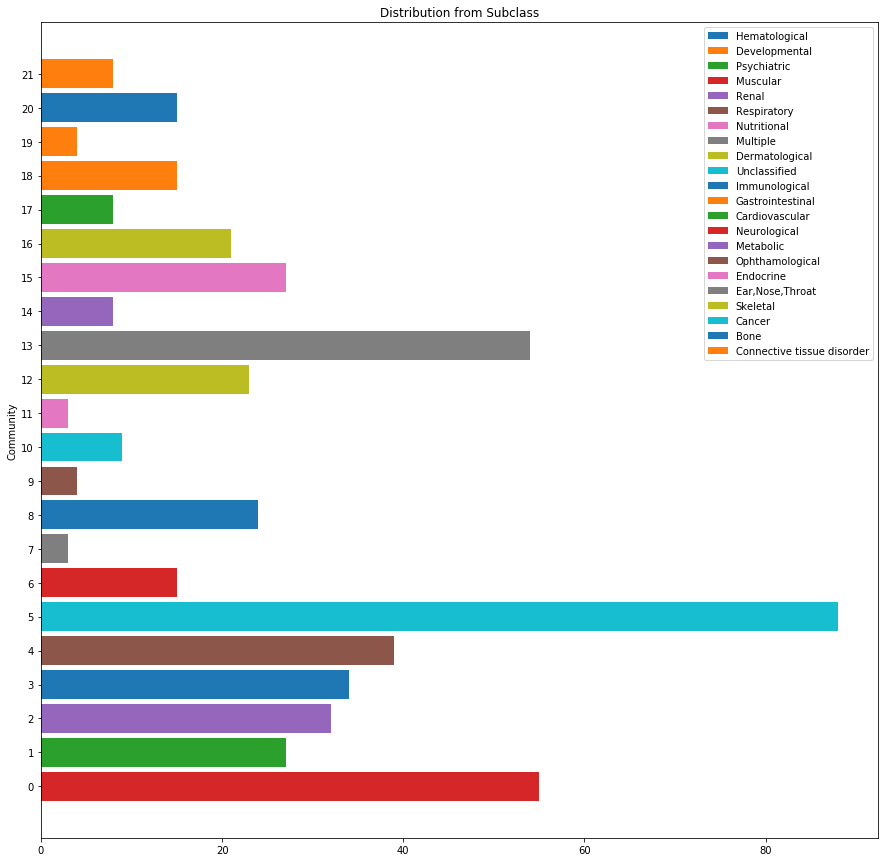

(22, 51)


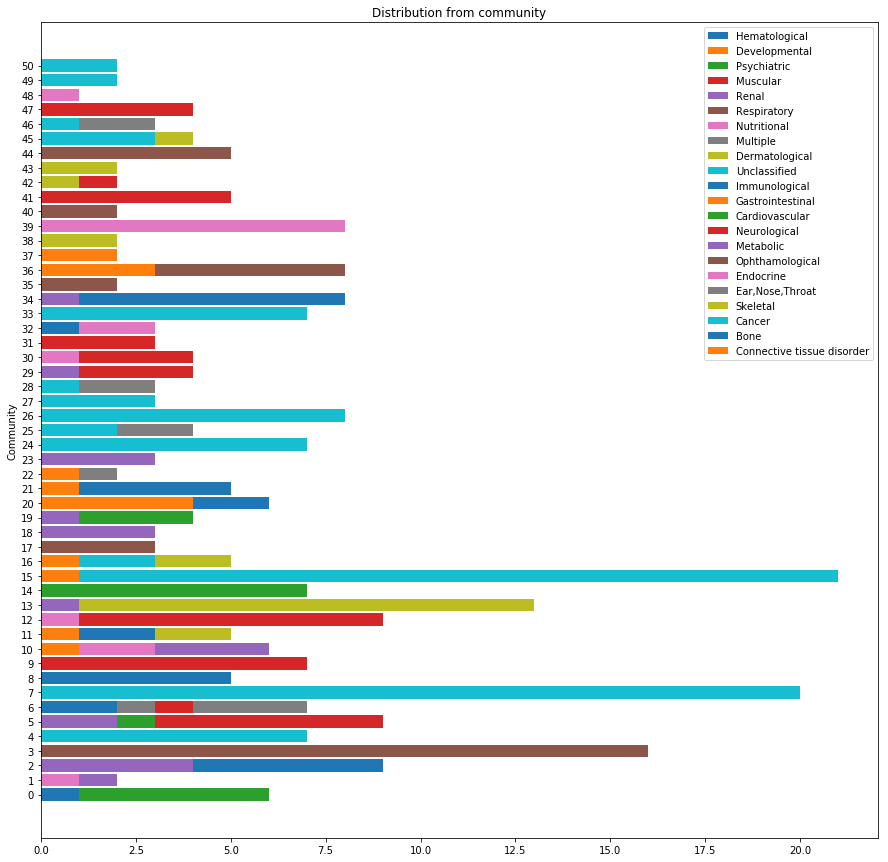

(22, 57)


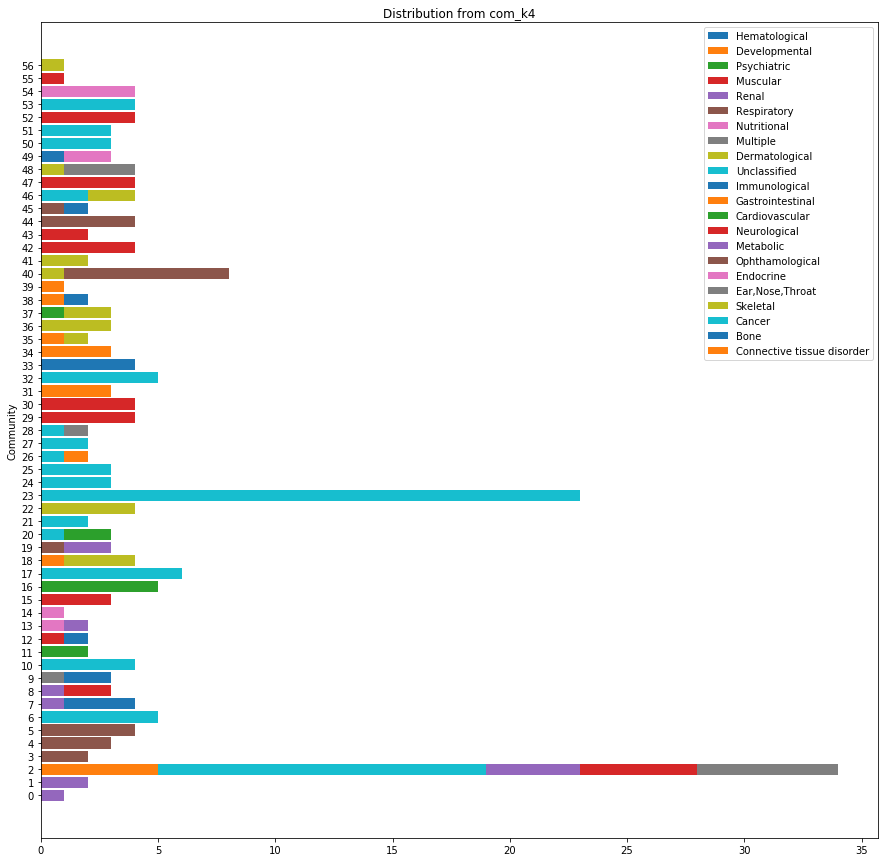

(22, 44)


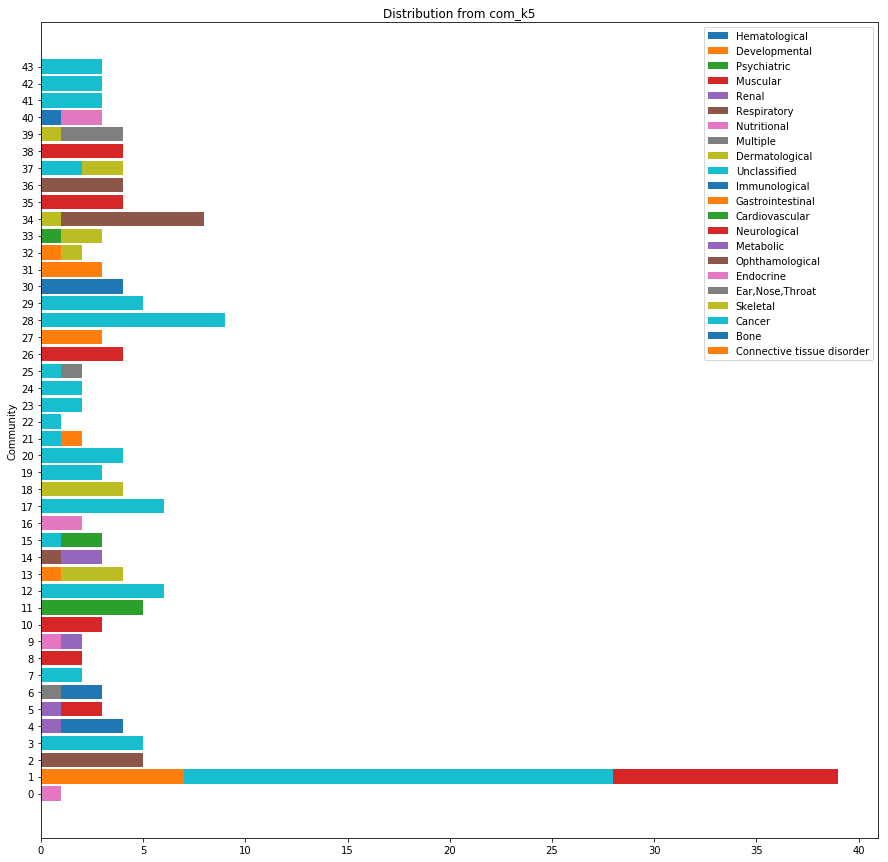

(22, 19)


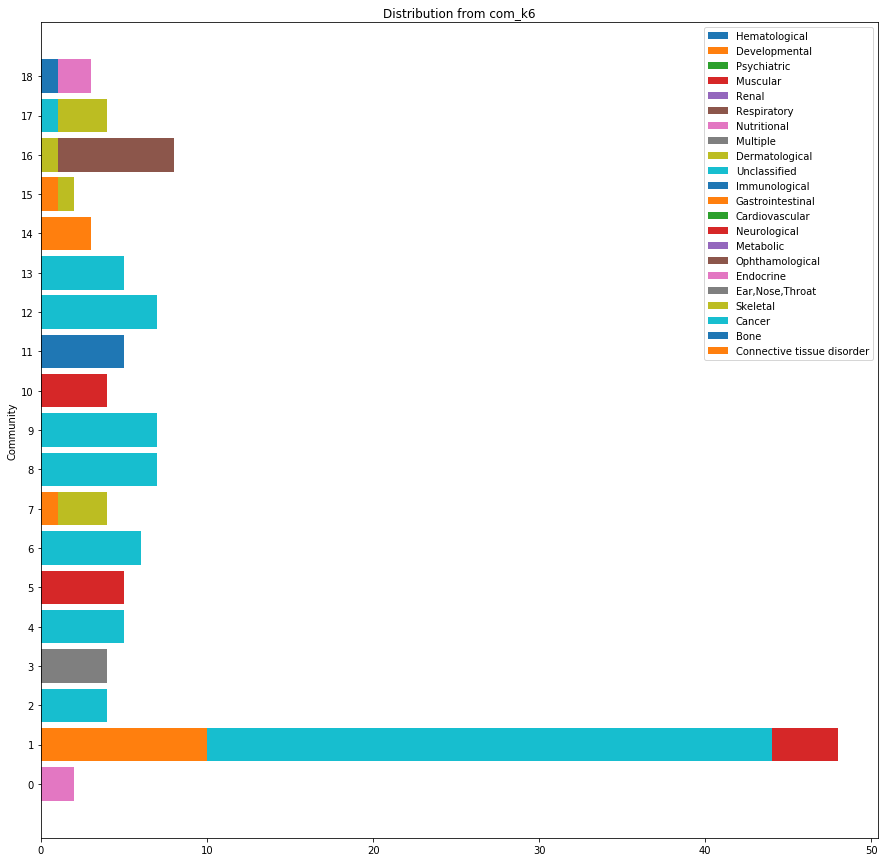

In [33]:
for com in ["Subclass","community","com_k4","com_k5","com_k6"]:
    stack_plot(w_U,com)

In [29]:
w_U.node[30]

{'Label': 'Alzheimer disease',
 'Subclass': 'Neurological',
 'com_k2': 100,
 'com_k3': 110,
 'com_k4': 110,
 'com_k5': 100,
 'com_k6': 100,
 'com_k7': 0,
 'com_k8': 0,
 'com_k9': 0,
 'community': 0,
 'Greedy modularity com': 1}

In [16]:
from networkx.algorithms.community import greedy_modularity_communities

In [17]:
c = greedy_modularity_communities(w_U)

In [19]:
len(c)

25

In [28]:
for idx, com in enumerate(c):
    for node in com:
        w_U.node[node]["Greedy modularity com"] = idx

(22, 25)


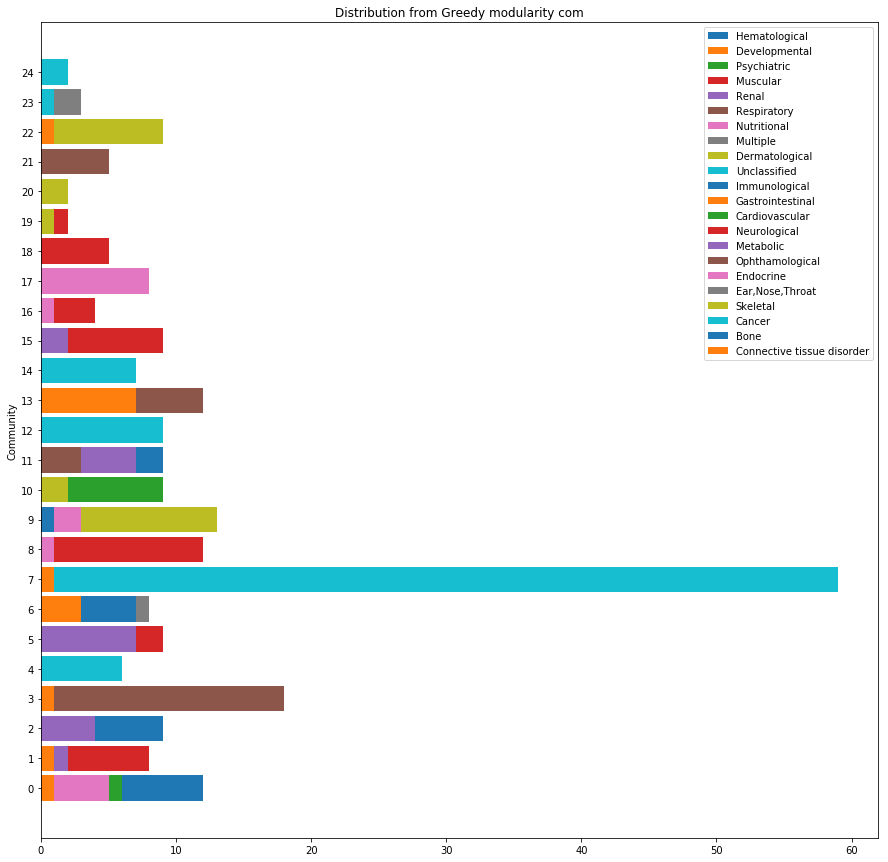

In [34]:
stack_plot(w_U,"Greedy modularity com")

/Users/viktortorpthomsen/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


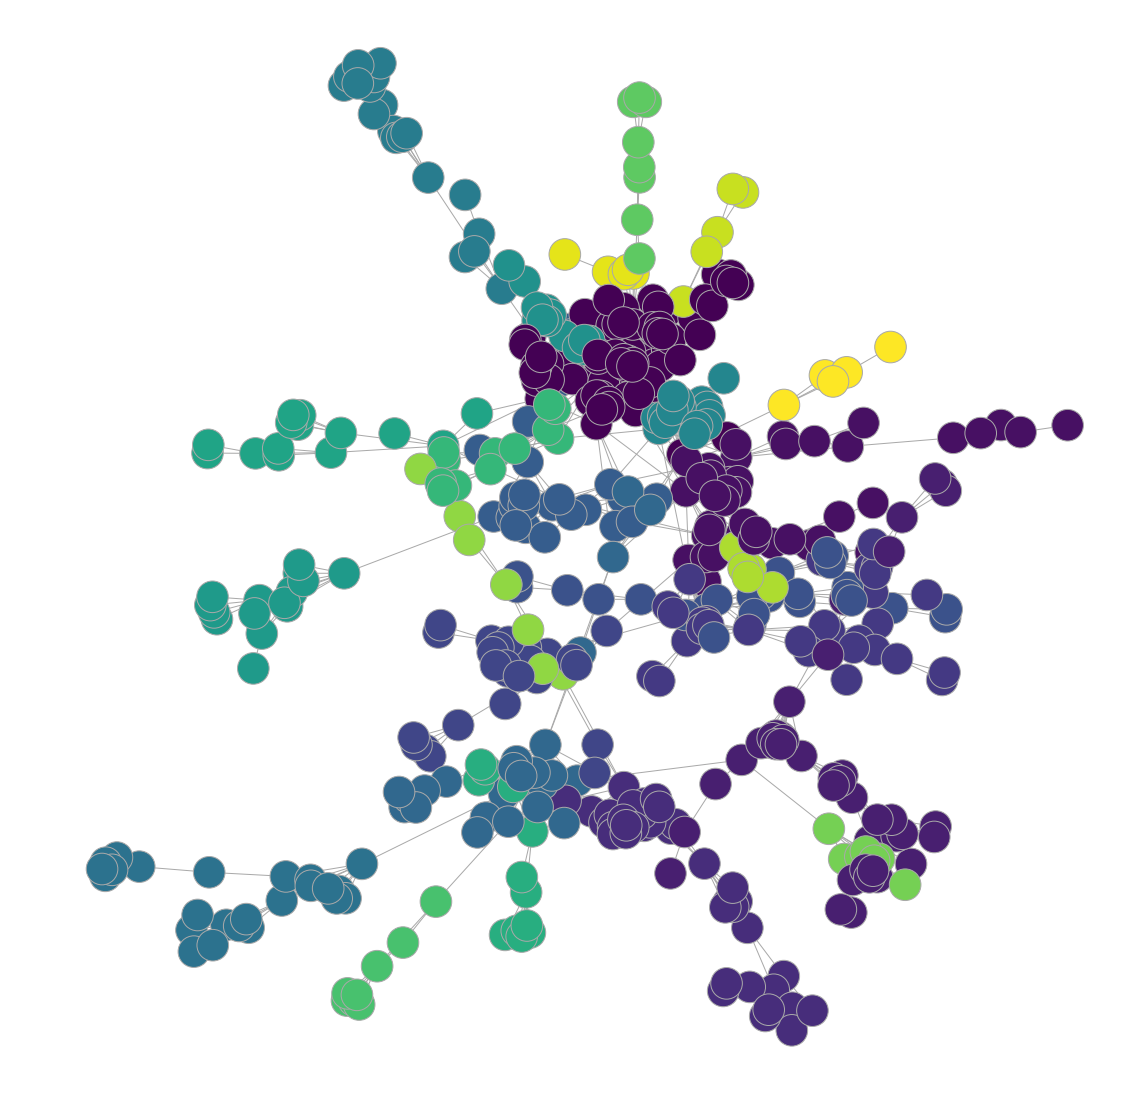

In [35]:
#degrees = G.degree(weight="weight")
#edges_weights = nx.get_edge_attributes(G,'weight')
colors = [w_U.node[node]["Greedy modularity com"] for node in w_U.nodes]
nx.draw(w_U, linewidths=1,node_color=colors, node_size=1000)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("darkgrey") 
ax.collections[1].set_edgecolor("darkgrey") 

In [ ]:
#for com in ["com_k4","com_k5","com_k6"]:
#    print("With {}".format(com))
#    plot_com(com)
#    print("\n\n\n")

In [ ]:
#com_k6 = {}
#for node in w_U.nodes():
#    com_k6.setdefault(w_U.nodes[node]['com_k7'],[])
#    com_k6[w_U.nodes[node]['com_k7']].append(w_U.nodes[node]['Subclass'])

In [ ]:
#for group in com_k6.keys():
#    temp_df = pd.DataFrame(np.array(com_k6[group]),columns=np.array([group]))
#    sns.catplot(x=group, kind="count", data=temp_df)
#    print(len(com_k6[group])," nodes in this community, with community number: {}".format(group))
#    plt.show()
#    print("\n\n")